# 01: Fits

In [58]:
import SMEFT19
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from flavio.statistics.functions import pull, pvalue

## Scenario I
Fit only to `C`, `beta_l` and `beta_q`

In [5]:
def fit(x):
    return -SMEFT19.likelihood_global(x, SMEFT19.scenarios.rotBI)

In [3]:
bf, v, d, L = SMEFT19.ellipse.minimum(fit, [-0.117, 0, 0.751])

Minimizing...
Pull: 5.832605775902271 sigma


In [6]:
bf

array([-1.20243556e-01,  3.66656452e-09,  7.79707015e-01])

In [7]:
-2*L

41.37047864622824

In [59]:
pvalue(-2*L, 3)

5.456838980677503e-09

In [8]:
SMEFT19.ellipse.save(bf, v, d, L, '../data/ellipses/rotBI.yaml', name='Mass Rotation fit, Scenario I',
                     fit='rotBI')

### Confidence intervals scenario I

In [9]:
dchi = SMEFT19.SMEFTglob.smelli.flavio.statistics.functions.delta_chi2(1,3)
dchi

3.5267403802617303

In [10]:
delta_C = []
for err in np.linspace(-0.10, 0.10, 20):
    delta_C.append(fit(np.array(bf) + np.array([err,0,0]))-L)

[<matplotlib.lines.Line2D at 0x7ff7377c5700>]

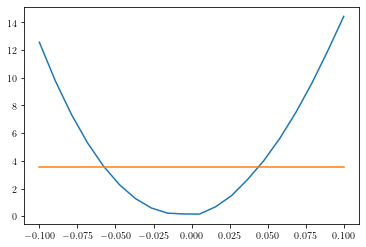

In [11]:
plt.plot(np.linspace(-0.10, 0.10, 20), delta_C)
plt.plot([-0.1, 0.1], [dchi,dchi])

**Error in C:** $\pm 0.05$ 

In [12]:
delta_bl = []
for err in np.linspace(-0.1, 0.1, 20):
    delta_bl.append(fit(np.array(bf) - np.array([0,err,0]))-L)

[<matplotlib.lines.Line2D at 0x7ff737719c10>]

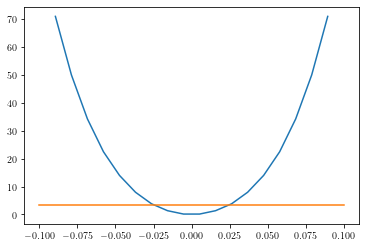

In [13]:
plt.plot(np.linspace(-0.1, 0.1, 20), delta_bl)
plt.plot([-0.1, 0.1], [dchi, dchi])

**Error in $\beta^\ell$:** $\pm 0.025$

In [14]:
delta_bq = []
for err in np.linspace(-2.0, 2.0, 20):
    delta_bq.append(fit(np.array(bf) + np.array([0,0,err]))-L)

(-1.0, 2.0)

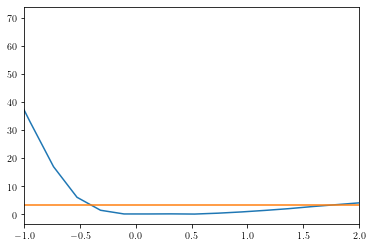

In [15]:
plt.plot(np.linspace(-2, 2, 20), delta_bq)
plt.plot([-2, 2], [dchi, dchi])
plt.xlim([-1,2])

**Error in $\beta^q$:** ${}^{+2.0}_{-0.5}$

## Scenario II
Fit to all parameters

In [16]:
def fit2(x):
    return -SMEFT19.likelihood_global(x, SMEFT19.scenarios.rotBII)

In [17]:
bf2, v2, d2, L2 = SMEFT19.ellipse.minimum(fit2, [-0.12, 0.07, 0, -0.076, 0.803])

Minimizing...
Pull: 6.698460199271297 sigma


In [18]:
bf2

array([-1.23230579e-01,  7.38813980e-02, -6.96147400e-09, -7.14576546e-02,
        7.11839814e-01])

In [19]:
-2*L2

58.84397165603657

In [60]:
pvalue(-2*L2, 5)

2.106270713397862e-11

In [20]:
SMEFT19.ellipse.save(bf2, v2, d2, L2, '../data/ellipses/rotBII.yaml', name='Mass Rotation fit, Scenario II',
                     fit='rotBII')

### Confidence intervals scenario II

In [21]:
dchi = SMEFT19.SMEFTglob.smelli.flavio.statistics.functions.delta_chi2(1,5)
dchi

5.887595445915204

In [22]:
delta_C = []
for err in np.linspace(-0.10, 0.10, 20):
    delta_C.append(fit2(np.array(bf2) + np.array([err,0,0,0,0]))-L)

[<matplotlib.lines.Line2D at 0x7ff7375c85b0>]

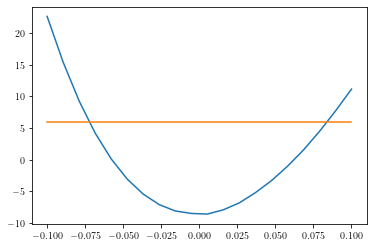

In [23]:
plt.plot(np.linspace(-0.10, 0.10, 20), delta_C)
plt.plot([-0.1, 0.1], [dchi, dchi])

**Error in C:** $\pm 0.08$

In [24]:
delta_al = []
for err in np.linspace(-0.07, 0.07, 20):
    delta_al.append(fit2(np.array(bf2) + np.array([0,err,0,0,0]))-L)

[<matplotlib.lines.Line2D at 0x7ff7376ca220>]

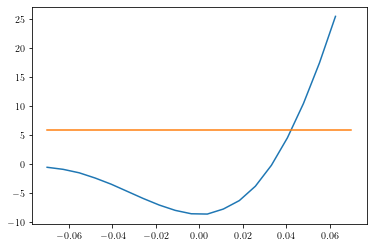

In [25]:
plt.plot(np.linspace(-0.07, 0.07, 20), delta_al)
plt.plot([-0.07, 0.07], [dchi, dchi])

**Error in $\alpha^\ell$:** ${}_{-0.07}^{+0.04}$

In [26]:
delta_bl = []
for err in np.linspace(-0.06, 0.06, 20):
    delta_bl.append(fit2(np.array(bf2) - np.array([0,0,err,0,0]))-L)

(-10.0, 80.0)

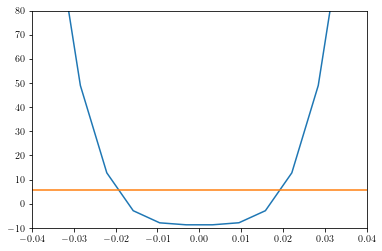

In [27]:
plt.plot(np.linspace(-0.06, 0.06, 20), delta_bl)
plt.plot([-0.06, 0.06], [dchi, dchi])
plt.xlim([-0.04, 0.04])
plt.ylim([-10, 80])

**Error in $\beta^\ell$:** $\pm0.025$

In [28]:
delta_aq = []
for err in np.linspace(-0.15, 0.07, 20):
    delta_aq.append(fit2(np.array(bf2) - np.array([0,0,0,err,0]))-L)

(-0.12, 0.07)

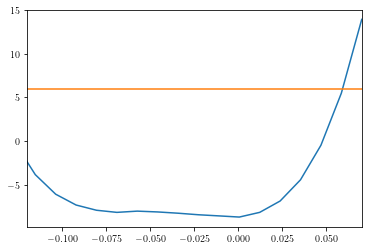

In [29]:
plt.plot(np.linspace(-0.15, 0.07, 20), delta_aq)
plt.plot([-0.15, 0.07], [dchi, dchi])
plt.xlim([-0.12, 0.07])

**Error in $\alpha^q$:** ${}_{-0.07}^{+0.12}$

In [30]:
delta_bq = []
for err in np.linspace(-0.7, 2.8, 20):
    delta_bq.append(fit2(np.array(bf2) + np.array([0,0,0,0,err]))-L)

[<matplotlib.lines.Line2D at 0x7ff7375cb2b0>]

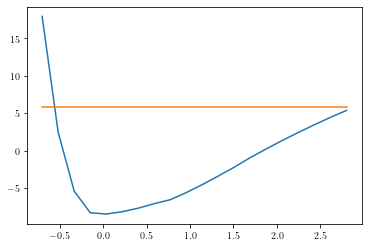

In [31]:
plt.plot(np.linspace(-0.7, 2.8, 20), delta_bq)
plt.plot([-0.7,2.8], [dchi, dchi])

**Error in $\beta^q$:** ${}^{+2.8}_{-0.6}$

In [32]:
pull(2*(L-L2), 2)

3.7741168784317796

### Matrix $\lambda^\ell$

In [33]:
SMEFT19.scenarios.idemp(bf2[1], bf2[2])

matrix([[ 5.42882793e-03, -5.11531258e-10,  7.34803086e-02],
        [-5.11531258e-10,  4.81990278e-17, -6.92368136e-09],
        [ 7.34803086e-02, -6.92368136e-09,  9.94571172e-01]])

In [34]:
al = np.random.uniform(0, 0.11, 200)
bl = np.random.uniform(-0.025, 0.025, 200)

In [35]:
ll = []
for i in range(200):
    ll.append(SMEFT19.scenarios.idemp(al[i], bl[i]))

In [36]:
np.std(ll, axis=0)

array([[0.00375811, 0.00092295, 0.03230599],
       [0.00092295, 0.00017737, 0.0138965 ],
       [0.03230599, 0.0138965 , 0.00377074]])

### Matrix $\lambda^q$

In [37]:
SMEFT19.scenarios.idemp(bf2[3], bf2[4])

matrix([[ 0.00337751, -0.03364576, -0.04726591],
        [-0.03364576,  0.33516901,  0.47084892],
        [-0.04726591,  0.47084892,  0.66145348]])

In [38]:
aq = np.random.uniform(bf2[3]-0.07, bf2[3]+0.12, 200)
bq = np.random.uniform(bf2[4]-0.6, bf2[4]+2.8, 200)

In [39]:
lq = []
for i in range(200):
    lq.append(SMEFT19.scenarios.idemp(aq[i], bq[i]))

In [40]:
np.std(lq, axis=0)

array([[0.00300697, 0.02093177, 0.02899252],
       [0.02093177, 0.28690303, 0.0863991 ],
       [0.02899252, 0.0863991 , 0.28537943]])

### Wilson coefficients

In [41]:
w = SMEFT19.scenarios.rotBII(bf2)
w2 = w.match_run(eft='WET', basis='flavio', scale=4.8)

In [42]:
C9 = w2.values['C9_bsmumu']['Re']
C10 = w2.values['C10_bsmumu']['Re']
C9e = w2.values['C9_bsee']['Re']
C10e = w2.values['C10_bsee']['Re']
Ctau = w2.values['CVL_bctaunutau']['Re']
print(f'C9e = {C9e}')
print(f'C10e = {C10e}')
print(f'C9mu = {C9}')
print(f'C10mu = {C10}')
print(f'CVLtau = {Ctau}')

C9e = -0.2485912590864919
C10e = -0.3622511983548864
C9mu = -0.6089555308639718
C10mu = -0.001886926577509734
CVLtau = 0.08920965126960981


In [43]:
-C10e+C9

-0.2467043325090854

In [44]:
Clq = np.random.uniform(bf2[0]-0.08, bf2[0]+0.08, 200)

In [45]:
WC = [[], [], [], [], []]
for i in range(200):
    w = SMEFT19.scenarios.rotBII((Clq[i], al[i], bl[i], aq[i], bq[i]))
    w2 = w.match_run(eft='WET', basis='flavio', scale=4.8)
    WC[0].append(w2.values['C9_bsmumu']['Re'])
    WC[1].append(w2.values['C10_bsmumu']['Re'])
    WC[2].append(w2.values['C9_bsee']['Re'])
    WC[3].append(w2.values['C10_bsee']['Re'])
    WC[4].append(w2.values['CVL_bctaunutau']['Re'])

In [46]:
np.std(WC, axis=1)

array([0.21452082, 0.01140372, 0.24837839, 0.23098781, 0.03112214])

## Observable Pulls

In [47]:
SMEFT19.comparepulls.compare(SMEFT19.scenarios.rotBII, '../data/ellipses/rotBII.yaml', '../data/TeX/pullsBII')

[Link to the table](https://github.com/Jorge-Alda/SMEFT19/blob/master/TeX/standalone_pullsBII.pdf)

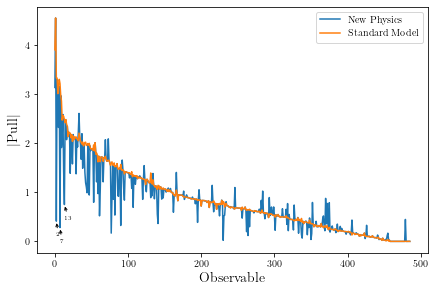

In [48]:
SMEFT19.plots.compare_plot(SMEFT19.scenarios.rotBII, '../data/ellipses/rotBII.yaml', '../data/plots/rotBII', 1.5)

In [49]:
evo = [0]*5
ranges = [[-0.08, 0.08], [-0.18, 0.07], [-0.025, 0.025], [-0.07, 0.12], [-0.6,2.8]]
labels = [r'$C$', r'$\alpha^\ell$', r'$\beta^\ell$', r'$\alpha^q$', r'$\beta^q$']
labelsplain = ['C', 'alphal', 'betal', 'alphaq', 'betaq']
fits = ['RK', 'RD', 'LFV', 'global']
fitcodes = {'RK':'likelihood_lfu_fcnc.yaml', 'RD':'likelihood_rd_rds.yaml',
            'LFV':'likelihood_lfv.yaml', 'global':'global'}
fitlabels = {'RK':r'$R_{K^{(*)}}$', 'RD':r'$R_{D^{(*)}}$',  'LFV':'LFV', 'global':'Global'}
fitcolors = {'RK':(0.8941176470588236, 0.10196078431372549, 0.10980392156862745),
             'RD':(0.21568627450980393, 0.49411764705882355, 0.7215686274509804),
             'LFV':(0.30196078431372547, 0.6862745098039216, 0.2901960784313726),
             'global':(1.0, 0.4980392156862745, 0.0)}

In [53]:
for i in range(5):
    xvalues = bf2[i] + np.linspace(ranges[i][0], ranges[i][1], 200)
    evoi = []
    for x in xvalues:
        bfx = bf2.copy()
        bfx[i] = x
        evoi.append(SMEFT19.likelihood_fits(bfx, SMEFT19.scenarios.rotBII))
    evo[i] = evoi

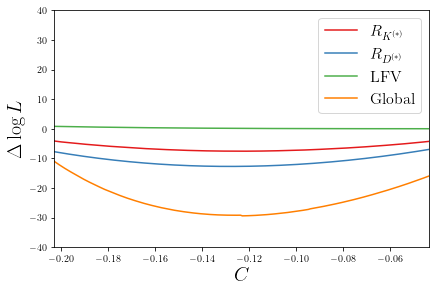

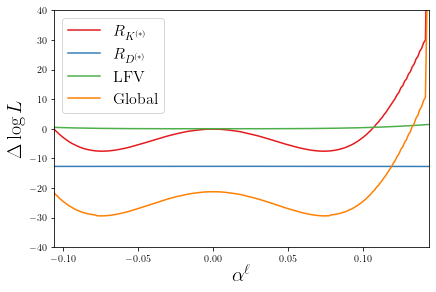

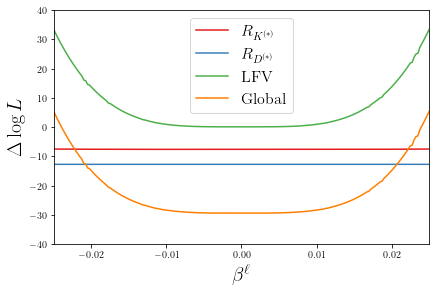

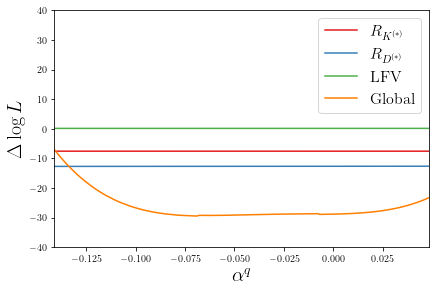

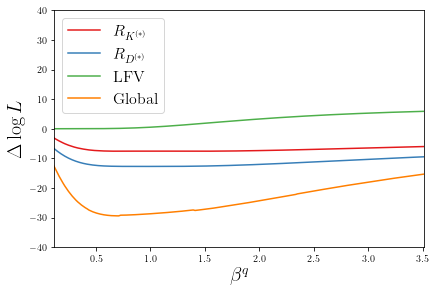

In [54]:
for i in range(5):
    xvalues = bf2[i] + np.linspace(ranges[i][0], ranges[i][1], 200)
    fig = plt.figure()
    for f in fits:
        plt.plot(xvalues, -pd.DataFrame(evo[i])[fitcodes[f]], lw=1.5, label=fitlabels[f], color=fitcolors[f])
    plt.ylim([-40,40])
    plt.xlim([bf2[i]+ranges[i][0], bf2[i]+ranges[i][1]])
    plt.legend(fontsize=16)
    plt.xlabel(labels[i], fontsize=20)
    plt.ylabel(r'$\Delta \log L$', fontsize=20)
    plt.tight_layout(pad=0.5)
    fig.savefig(f'../data/plots/evoplot_{labelsplain[i]}.pdf')
    fig.savefig(f'../data/plots/evoplot_{labelsplain[i]}.pgf')

## Leptoquark couplings

In [55]:
SMEFT19.scenarios.rot2lqU1(bf)

Casting complex values to real discards the imaginary part


matrix([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 1.65841267e-09, 4.52306965e-01],
        [0.00000000e+00, 2.12696902e-09, 5.80098622e-01]])

In [57]:
SMEFT19.scenarios.rot2lqU1(bf2)

Casting complex values to real discards the imaginary part


matrix([[-3.18872414e-03,  3.00457501e-10, -4.31600406e-02],
        [ 3.17651176e-02, -2.99306789e-09,  4.29947435e-01],
        [ 4.46239687e-02, -4.20469301e-09,  6.03994643e-01]])